In [8]:
from pitch_processing import get_peaks, get_onset, get_spectrum
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [4]:
fname = '../data_old/piano_notes/one_octave/A2.wav'
fs, x = read(fname)
x = np.array(x, np.float)
x /= max(abs(x))
ton = get_onset(fs, x)
snippet = x[int(ton*fs):int(ton*fs)+2048]
freq, mY, pY = get_spectrum(fs, snippet, 2048*8)

In [66]:
# high pass
df = freq[1]
wp = 20*2*np.pi/df; ws = 10*2*np.pi/df; gpass = 1; gstop = 4
b, a = scipy.signal.iirdesign(wp, ws, gpass, gstop)
mY_lowpass = scipy.signal.filtfilt(b, a, mY)

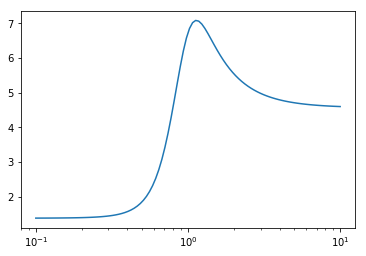

In [67]:
sys = scipy.signal.TransferFunction(a, b)
w, mag, phase = scipy.signal.bode(sys)
plt.semilogx(w, mag)

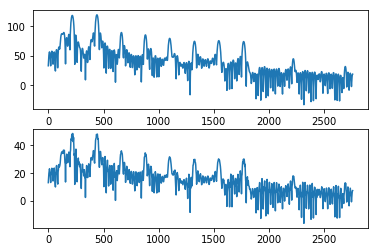

In [68]:
plt.subplot(2,1,1)
plt.plot(freq, mY)
plt.subplot(2,1,2)
plt.plot(freq, mY_lowpass)